# Running Requirements


In [2]:
# !nvidia-smi
# !/usr/local/cuda/bin/nvcc --version

In [3]:
# %pip install -i https://pypi.gurobi.com gurobipy
# %pip install pulp

In [4]:
import numpy as np
import pandas as pd
import pulp
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Data Preparation

## Data Collection

In [5]:
graph_3f = pd.read_csv("DATA-SHU 240 Data Representation - Sheet1.csv")
graph_3f
graph_3f_weights = pd.read_csv("DATA-SHU 240 Data Representation - Sheet2.csv")
graph_3f_weights

,node,weight
0,1,1
1,2,4
2,3,1
3,4,1
4,5,2
5,6,2
6,7,2
7,8,1
8,9,4
9,10,1


In [6]:
# import networkx as nx
# import sys

# def floyd_warshall(graph):
#     nodes = graph.nodes()
#     adjacency_matrix = np.array(nx.adjacency_matrix(graph).todense())
#     distances = adjacency_matrix.copy()
#     num_nodes = len(nodes)

#     for i in range(num_nodes):
#         for j in range(num_nodes):
#             if i != j and distances[i, j] == 0:
#                 distances[i, j] = sys.maxsize

#     for k in range(num_nodes):
#         for i in range(num_nodes):
#             for j in range(num_nodes):
#                 if distances[i, k] + distances[k, j] < distances[i, j]:
#                     distances[i, j] = distances[i, k] + distances[k, j]

#     return distances

# # Example graph
# G = nx.Graph()
# G.add_edge('A', 'B', weight=1)
# G.add_edge('B', 'C', weight=2)
# G.add_edge('A', 'C', weight=4)
# G.add_edge('C', 'D', weight=1)

# # Run the algorithm
# distances = floyd_warshall(G)

# print(distances)

# # Print all-pair shortest paths
# nodes = G.nodes()
# for i, src in enumerate(nodes):
#     for j, dst in enumerate(nodes):
#         if src != dst:
#             print(f"Shortest path from {src} to {dst}: {distances[i, j]}")

In [7]:
import networkx as nx

G = nx.Graph()
for i in graph_3f_weights.index:
    G.add_node(graph_3f_weights['node'][i], weight=graph_3f_weights['weight'][i])

nodes = list(G.nodes.data())
nodes
weights = np.array([i[1]['weight'] for i in nodes])
weights

array([1, 4, 1, 1, 2, 2, 2, 1, 4, 1, 2, 1, 1, 3, 2])

In [8]:
for i in graph_3f.index:
    G.add_edge(graph_3f['edge_from'][i], graph_3f['edge_to'][i], weight=graph_3f['weight'][i])

distances = nx.floyd_warshall(G)
distance_matrix = pd.DataFrame.from_dict(distances)
distance_matrix.sort_index(inplace=True)
distance_matrix.sort_index(axis=1, inplace=True)
distance_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0.000,8.559,23.064,30.819,38.771,44.712,44.736,58.317,66.089,72.406,62.252,41.309,27.780,11.166,20.676
2,8.559,0.000,14.505,22.260,30.212,36.153,36.177,49.758,57.530,64.666,70.811,49.868,36.339,19.725,29.235
3,23.064,14.505,0.000,36.765,44.717,50.658,50.682,64.263,72.035,79.171,85.316,64.373,50.844,34.230,43.740
4,30.819,22.260,36.765,0.000,7.952,13.893,13.917,27.498,35.270,42.406,52.560,72.128,58.599,41.985,51.495
5,38.771,30.212,44.717,7.952,0.000,21.845,21.869,35.450,43.222,50.358,60.512,80.080,66.551,49.937,59.447
6,44.712,36.153,50.658,13.893,21.845,0.000,14.232,27.813,35.585,42.721,52.875,73.818,72.492,55.878,65.388
7,44.736,36.177,50.682,13.917,21.869,14.232,0.000,13.581,21.353,28.489,38.643,59.586,72.516,55.902,65.412
8,58.317,49.758,64.263,27.498,35.450,27.813,13.581,0.000,7.772,14.908,25.062,46.005,59.534,69.483,75.658
9,66.089,57.530,72.035,35.270,43.222,35.585,21.353,7.772,0.000,7.136,17.290,38.233,51.762,68.376,67.886
10,72.406,64.666,79.171,42.406,50.358,42.721,28.489,14.908,7.136,0.000,10.154,31.097,44.626,61.240,60.750


In [9]:
# Create a adjacency matrix
adjacency_matrix = np.zeros((len(nodes), len(nodes)))
for edge_from, edge_to,_ in graph_3f.to_numpy():
    edge_from = int(edge_from)
    edge_to = int(edge_to)
    adjacency_matrix[edge_from-1][edge_to-1] = 1
    adjacency_matrix[edge_to-1][edge_from-1] = 1
adjacency_matrix

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.

## Data Visualization


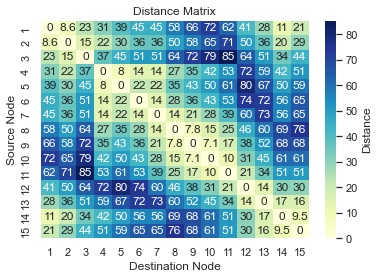

In [10]:
# Create a heatmap
sns.set_theme()
ax = sns.heatmap(
    distance_matrix,
    annot=True,
    cmap="YlGnBu",
    cbar_kws={'label': 'Distance'},
    xticklabels=G.nodes,
    yticklabels=G.nodes)

# set title
ax.set_xlabel("Destination Node")
ax.set_ylabel("Source Node")
ax.set_title("Distance Matrix")

# Show the heatmap
plt.show()

## Model Parameter Values

In [19]:
# sites count ('0' is depot) 
num_of_sites = len(nodes)

# the total time limit
time_limit = 120

# fix random seed
np.random.seed(seed=777)

# Create a adjacency matrix
adjacency_matrix = np.zeros((num_of_sites, num_of_sites))
for edge_from, edge_to,_ in graph_3f.to_numpy():
    edge_from = int(edge_from)
    edge_to = int(edge_to)
    adjacency_matrix[edge_from-1][edge_to-1] = 1
    adjacency_matrix[edge_to-1][edge_from-1] = 1

# Model Formulation (Two-Index Formulation)

In [20]:
# solve with pulp
# definition of LpProblem instance
problem = pulp.LpProblem("CVRP", pulp.LpMaximize)

# definition of variables which are 0/1
x = [[pulp.LpVariable("x%s_%s"%(i,j), cat="Binary") if i != j else None for j in range(num_of_sites)] for i in range(num_of_sites)]
y = np.array(x)
t = [pulp.LpVariable("t%s"%i, cat='Continuous') for i in range(num_of_sites)]
T = np.array(t)

# add objective function
problem += pulp.lpSum((weights[i] + weights[j]) * y[i][j] / 2 if i != j else 0
                        for j in range(num_of_sites) 
                        for i in range(num_of_sites))

# constraints
# formula (2)
for j in range(1, num_of_sites):
    problem += pulp.lpSum(y[i][j] if i != j else 0 
                            for i in range(num_of_sites)) <= 1 
    
# formula (3)
problem += pulp.lpSum(y[0][j] for j in range(1,num_of_sites)) == 1
problem += pulp.lpSum(y[i][0] for i in range(1,num_of_sites)) == 1

# formula (4)
for j in range(num_of_sites):
    problem += pulp.lpSum(y[i][j] if i != j else 0 
                          for i in range(num_of_sites)) - pulp.lpSum(y[j][i] if i != j else 0 for i in range(num_of_sites)) == 0
    
# formula (5)
problem += pulp.lpSum(distance_matrix[i+1][j+1] * y[i][j] if i < j else 0 for i in range(num_of_sites) for j in range (1,num_of_sites)) <= time_limit 

# formula (6)
for i in range(num_of_sites):
    for j in range(num_of_sites):
        if i != j:
            problem += (y[i][j] <= int(adjacency_matrix[i][j]))

# formula (7)
for i in range(num_of_sites):
    for j in range(num_of_sites):
        if i != j:
            problem += (x[j][i] != x[i][j])


if problem.solve() == 1:
    print('Total Weight:', pulp.value(problem.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/gengliyuan/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/k1/yq2w74451blfy4r2nxn075400000gn/T/eecf615dc57f43e3a8e482189c355f2e-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/k1/yq2w74451blfy4r2nxn075400000gn/T/eecf615dc57f43e3a8e482189c355f2e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 247 COLUMNS
At line 1837 RHS
At line 2080 BOUNDS
At line 2291 ENDATA
Problem MODEL has 242 rows, 210 columns and 959 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 27 - 0.00 seconds
Cgl0002I 176 variables fixed
Cgl0004I processed model has 25 rows, 30 columns (30 integer (30 of which binary)) and 102 elements
Cutoff increment increased from 1e-05 to 0.4999
Cbc0038I Initial state - 0 integers unsatisfied sum - 1.33227e-15
Cbc0038

In [21]:
varValues = np.zeros((num_of_sites, num_of_sites))
for i in range(len(x)):
    for j in range(len(x[i])):
        if x[i][j] != None:
            varValues[i][j] = x[i][j].varValue
varValues

# # Print out the result
# for i in range(len(varValues)):
#     for j in range(len(varValues)):
#         if varValues[i][j]==1:
#             print(f"{i+1,j+1}->{i+1,j+1}")

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [14]:
import pulp
from itertools import product

# Problem data
customers = [1, 2, 3, 4]
vehicle = 1
demand = {1: 3, 2: 4, 3: 2, 4: 5}
capacity = 6
cost_matrix = {
    (0, 1): 10, (0, 2): 20, (0, 3): 30, (0, 4): 40,
    (1, 0): 10, (1, 2): 15, (1, 3): 25, (1, 4): 35,
    (2, 0): 20, (2, 1): 15, (2, 3): 20, (2, 4): 30,
    (3, 0): 30, (3, 1): 25, (3, 2): 20, (3, 4): 15,
    (4, 0): 40, (4, 1): 35, (4, 2): 30, (4, 3): 15,
}

# Create the CVRP model
model = pulp.LpProblem("CVRP", pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts("x", ((i, j) for i, j in product(customers + [0], customers + [0])), cat="Binary")
u = pulp.LpVariable.dicts("u", customers, lowBound=0, cat="Continuous")

# Objective function
model += pulp.lpSum(cost_matrix[(i, j)] * x[i, j] for i, j in product(customers, customers + [0]))

# Constraints
for j in customers:
    model += pulp.lpSum(x[i, j] for i in customers + [0]) == 1

model += pulp.lpSum(x[0, j] for j in customers) == 1
model += pulp.lpSum(x[i, 0] for i in customers) == 1

for i, j in product(customers, customers):
    if i != j:
        model += x[i, j] <= 1
        model += u[i] + demand[j] - u[j] <= capacity * (1 - x[i, j])

# Solve the problem
model.solve()

# Print the solution
print("Objective value:", pulp.value(model.objective))
route = [0]
i = 0
while True:
    i = next((j for j in customers if pulp.value(x[i, j]) == 1), None)
    if i is None:
        break
    route.append(i)
route.append(0)
print("Route:", " -> ".join(map(str, route)))

KeyError: (1, 1)

In [ ]:
# solve with pulp
# definition of LpProblem instance
problem = pulp.LpProblem("CVRP", pulp.LpMaximize)

# definition of variables which are 0/1
x = [[[pulp.LpVariable("x%s_%s,%s"%(i,j,k), cat="Binary") if i != j else None for k in range(vehicle_count)]for j in range(num_of_sites)] for i in range(num_of_sites)]

# add objective function
problem += pulp.lpSum(distance_matrix[i][j] * x[i][j][k] if i != j else 0
                        for k in range(vehicle_count) 
                        for j in range(customer_count) 
                        for i in range (customer_count))

# constraints
# foluma (2)
for j in range(1, customer_count):
    problem += pulp.lpSum(x[i][j][k] if i != j else 0 
                            for i in range(customer_count) 
                            for k in range(vehicle_count)) == 1 

# foluma (3)
for k in range(vehicle_count):
    problem += pulp.lpSum(x[0][j][k] for j in range(1,customer_count)) == 1
    problem += pulp.lpSum(x[i][0][k] for i in range(1,customer_count)) == 1

# foluma (4)
for k in range(vehicle_count):
    for j in range(customer_count):
        problem += pulp.lpSum(x[i][j][k] if i != j else 0 
                                for i in range(customer_count)) -  pulp.lpSum(x[j][i][k] for i in range(customer_count)) == 0

#foluma (5)
for k in range(vehicle_count):
    problem += pulp.lpSum(df.demand[j] * x[i][j][k] if i != j else 0 for i in range(customer_count) for j in range (1,customer_count)) <= vehicle_capacity 


# fomula (6)
subtours = []
for i in range(2,customer_count):
        subtours += itertools.combinations(range(1,customer_count), i)

for s in subtours:
    problem += pulp.lpSum(x[i][j][k] if i !=j else 0 for i, j in itertools.permutations(s,2) for k in range(vehicle_count)) <= len(s) - 1


# print vehicle_count which needed for solving problem
# print calculated minimum distance value
if problem.solve() == 1:
    print('Vehicle Requirements:', vehicle_count)
    print('Moving Distance:', pulp.value(problem.objective))
    break

NameError: name 'vehicle_count' is not defined

In [ ]:
import pulp
from itertools import product

# Problem data
customers = [1, 2, 3, 4]
vehicles = [1, 2]
demand = {1: 3, 2: 4, 3: 2, 4: 5}
capacity = {1: 6, 2: 6}
cost_matrix = {
    (0, 1): 10, (0, 2): 20, (0, 3): 30, (0, 4): 40,
    (1, 0): 10, (1, 2): 15, (1, 3): 25, (1, 4): 35,
    (2, 0): 20, (2, 1): 15, (2, 3): 20, (2, 4): 30,
    (3, 0): 30, (3, 1): 25, (3, 2): 20, (3, 4): 15,
    (4, 0): 40, (4, 1): 35, (4, 2): 30, (4, 3): 15,
}

# Create the CVRP model
model = pulp.LpProblem("CVRP", pulp.LpMinimize)

# Variables
x = pulp.LpVariable.dicts("x", ((i, j, k) for i, j, k in product(customers, customers + [0], vehicles)), cat="Binary")
u = pulp.LpVariable.dicts("u", ((i, k) for i, k in product(customers, vehicles)), lowBound=0, cat="Continuous")

# Objective function
model += pulp.lpSum(cost_matrix[i, j] * x[i, j, k] for i, j, k in product(customers, customers + [0], vehicles))

# Constraints
for j in customers:
    model += pulp.lpSum(x[i, j, k] for i, k in product(customers + [0], vehicles)) == 1

for k in vehicles:
    model += pulp.lpSum(x[0, j, k] for j in customers) == 1
    model += pulp.lpSum(x[i, 0, k] for i in customers) == 1

for k in vehicles:
    for i, j in product(customers, customers):
        if i != j:
            model += x[i, j, k] <= 1
            model += u[i, k] + demand[j] - u[j, k] <= capacity[k] * (1 - x[i, j, k])

# Solve the problem
model.solve()

# Print the solution
print("Objective value:", pulp.value(model.objective))
for k in vehicles:
    print(f"Vehicle {k}:")
    route = [0]
    i = 0
    while True:
        i = next((j for j in customers if pulp.value(x[i, j, k]) == 1), None)
        if i is None:
            break
        route.append(i)
    route.append(0)
    print(" -> ".join(map(str, route)))

KeyError: (1, 1)